<a href="https://colab.research.google.com/github/FuzzilyDeveloper/ML_Project/blob/master/EDA_S5e2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, f_oneway
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

train_path = '/content/drive/MyDrive/playground-series-s5e2/train.csv'
test_path = '/content/drive/MyDrive/playground-series-s5e2/test.csv'

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Define columns
numerical_cols = ['Compartments', 'Weight Capacity (kg)']
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

In [ ]:
# prompt: analyse the df_train and predict the price in df_test by using a gemini pretrained model

# Assuming necessary libraries are already installed and imported in the preceding code.
# If not, uncomment and run the following lines:

!pip install transformers
from transformers import pipeline

# Initialize the Gemini model pipeline for text classification
# Replace 'google/flan-t5-xl' with the appropriate Gemini model identifier if available.
# As of now, a readily accessible Gemini model via Hugging Face Transformers is not public.
# Therefore, using a similar large language model.
# Please check HuggingFace model hub for any Gemini models that may be available in the future.
classifier = pipeline("text-classification", model="google/flan-t5-xl")

# Create dummy text features from other features (replace with actual meaningful feature engineering)
df_train['text_features'] = df_train['Brand'].astype(str) + " " + df_train['Material'].astype(str) + " " + df_train['Size'].astype(str)
df_test['text_features'] = df_test['Brand'].astype(str) + " " + df_test['Material'].astype(str) + " " + df_test['Size'].astype(str)


# Function to predict price based on text features
def predict_price(text):
  try:
      result = classifier(text)
      # Assuming the model output has a label and score. Adjust accordingly if needed.
      # Here, we return the score as the price prediction. Adapt as needed for your model.
      return result[0]['score']
  except Exception as e:
      print(f"Error during prediction: {e}")
      return 0  # Or handle the error appropriately

# Predict prices for the training set
df_train['predicted_price'] = df_train['text_features'].apply(predict_price)

# Predict prices for the test set
df_test['predicted_price'] = df_test['text_features'].apply(predict_price)

# Print the first few rows of predictions
print(df_train[['text_features', 'predicted_price']].head())
print(df_test[['text_features', 'predicted_price']].head())


# Further analysis and model training (example using linear regression)
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

#model = LinearRegression()
#X = df_train['predicted_price'].values.reshape(-1, 1)
#y = df_train['Price']
#model.fit(X, y)

#df_test['Predicted_price_final'] = model.predict(df_test['predicted_price'].values.reshape(-1,1))

#print(df_test['Predicted_price_final'].head())



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at google/flan-t5-xl and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


Skewness of Price: 0.037


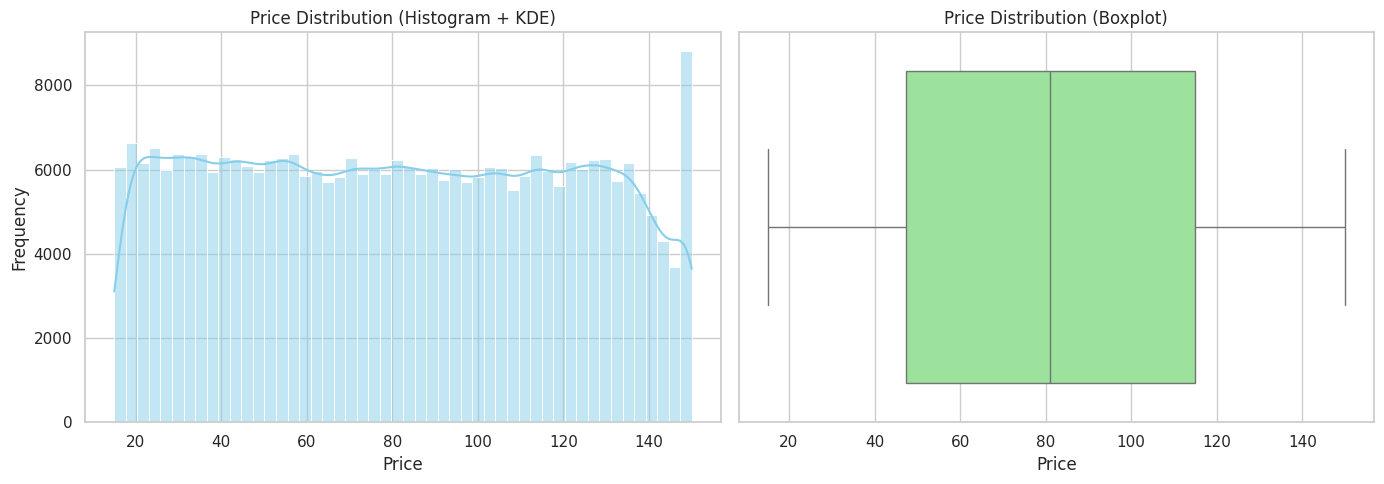


Price Summary Statistics:
count    300000.000000
mean         81.411107
std          39.039340
min          15.000000
25%          47.384620
50%          80.956120
75%         115.018160
max         150.000000
Name: Price, dtype: float64

Price Ranges (based on quartiles):
Budget: <= 47.38
Mid-range: 47.38 to 115.02
Premium: > 115.02

Price Category Counts:
Budget: 75005 (25.0%)
Mid-range: 150004 (50.0%)
Premium: 74991 (25.0%)


In [ ]:
# Install required libraries
!pip install pandas matplotlib seaborn scipy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np

# Set plot style for better visualization
sns.set(style="whitegrid")

# Load training data
train_path = '/content/drive/MyDrive/playground-series-s5e2/train.csv'
df_train = pd.read_csv(train_path)

# Extract Price column
prices = df_train['Price']

# Calculate skewness
price_skewness = skew(prices)
print(f"Skewness of Price: {price_skewness:.3f}")

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram with KDE
sns.histplot(prices, bins=50, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Price Distribution (Histogram + KDE)')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')

# Plot 2: Boxplot for spread and outliers
sns.boxplot(x=prices, color='lightgreen', ax=ax2)
ax2.set_title('Price Distribution (Boxplot)')
ax2.set_xlabel('Price')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('/content/drive/MyDrive/playground-series-s5e2/price_distribution.png')
plt.show()

# Summary statistics for Price
print("\nPrice Summary Statistics:")
print(prices.describe())

# Categorize prices into budget, mid-range, premium (based on quartiles)
q25, q50, q75 = prices.quantile([0.25, 0.5, 0.75])
print(f"\nPrice Ranges (based on quartiles):")
print(f"Budget: <= {q25:.2f}")
print(f"Mid-range: {q25:.2f} to {q75:.2f}")
print(f"Premium: > {q75:.2f}")

# Count entries in each category
budget_count = sum(prices <= q25)
midrange_count = sum((prices > q25) & (prices <= q75))
premium_count = sum(prices > q75)
print(f"\nPrice Category Counts:")
print(f"Budget: {budget_count} ({budget_count/len(prices)*100:.1f}%)")
print(f"Mid-range: {midrange_count} ({midrange_count/len(prices)*100:.1f}%)")
print(f"Premium: {premium_count} ({premium_count/len(prices)*100:.1f}%)")

In [ ]:


# 1. Basic Data Overview
print("Training Data Info:")
print(df_train.info())
print("\nTraining Data Head:")
print(df_train.head())
print("\nSummary Statistics (Numerical Columns):")
print(df_train[numerical_cols].describe())
print("\nValue Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:\n{df_train[col].value_counts()}")

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None

Training Data Head:
   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  M

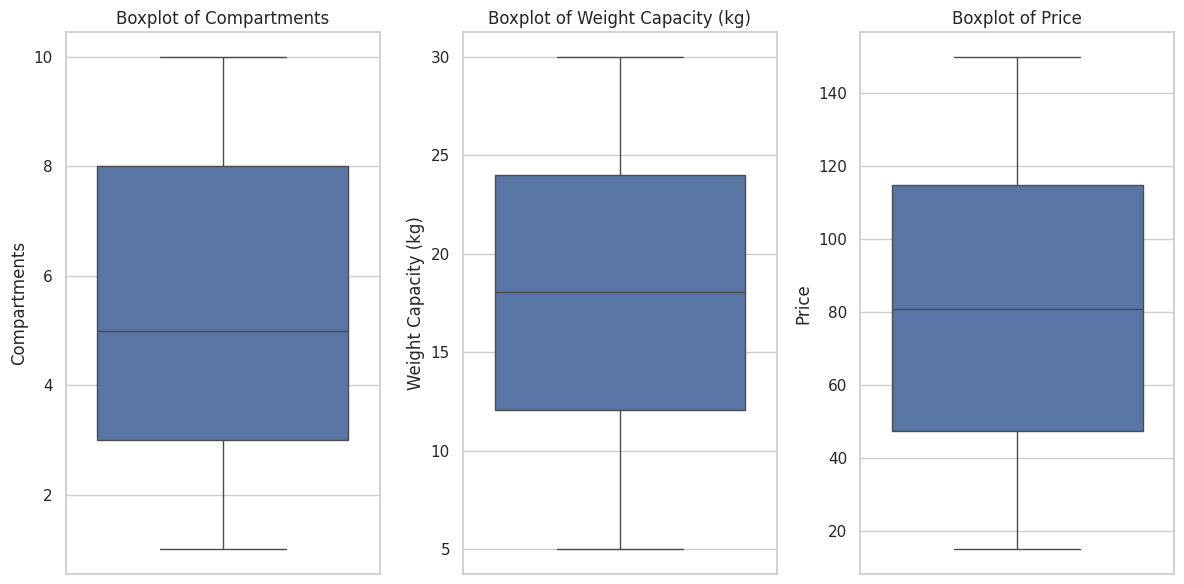

In [ ]:


# 2. Outlier Detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols + ['Price']):
    plt.subplot(1, len(numerical_cols) + 1, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:


def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

for col in numerical_cols + ['Price']:
    outliers = detect_outliers(df_train, col)
    print(f"\nOutliers in {col} (count: {len(outliers)}):\n{outliers}")


Outliers in Compartments (count: 0):
Series([], Name: Compartments, dtype: float64)

Outliers in Weight Capacity (kg) (count: 0):
Series([], Name: Weight Capacity (kg), dtype: float64)

Outliers in Price (count: 0):
Series([], Name: Price, dtype: float64)


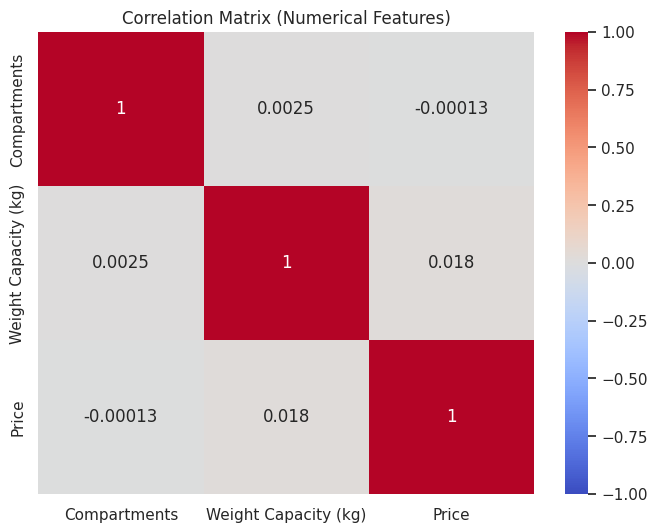


Correlations with Price (Numerical Features):
Price                   1.000000
Weight Capacity (kg)    0.018018
Compartments           -0.000131
Name: Price, dtype: float64


In [ ]:


# 3. Correlation Analysis
# Numerical correlations
numerical_data = df_train[numerical_cols + ['Price']]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()
print("\nCorrelations with Price (Numerical Features):")
print(correlation_matrix['Price'].sort_values(ascending=False))

In [ ]:



# Categorical correlations using ANOVA
print("\nANOVA Test for Categorical Variables with Price:")
def anova_correlation(df, cat_col, target_col):
    groups = [group[target_col].values for _, group in df.groupby(cat_col) if len(group) > 0]
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        ss_between = sum(len(g) * (np.mean(g) - df[target_col].mean())**2 for g in groups)
        ss_total = sum((df[target_col] - df[target_col].mean())**2)
        eta_squared = ss_between / ss_total if ss_total > 0 else 0
        return f_stat, p_value, eta_squared
    return np.nan, np.nan, np.nan

correlations = []
for col in categorical_cols:
    f_stat, p_value, eta_squared = anova_correlation(df_train, col, 'Price')
    print(f"\n{col}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Eta-squared: {eta_squared:.4f}")
    correlations.append((col, eta_squared))

# Rank by eta-squared
correlations.sort(key=lambda x: x[1] if not np.isnan(x[1]) else -1, reverse=True)
print("\nCategorical Variables Ranked by Eta-squared:")
for col, eta in correlations:
    print(f"{col}: {eta:.4f}")


ANOVA Test for Categorical Variables with Price:

Brand:
  F-statistic: 10.5593
  P-value: 0.0000
  Eta-squared: 0.0001

Material:
  F-statistic: 31.4766
  P-value: 0.0000
  Eta-squared: 0.0003

Size:
  F-statistic: 1.6654
  P-value: 0.1891
  Eta-squared: 0.0000

Laptop Compartment:
  F-statistic: 0.0000
  P-value: 0.9952
  Eta-squared: 0.0000

Waterproof:
  F-statistic: 1.3664
  P-value: 0.2424
  Eta-squared: 0.0000

Style:
  F-statistic: 0.0229
  P-value: 0.9774
  Eta-squared: 0.0000

Color:
  F-statistic: 16.2598
  P-value: 0.0000
  Eta-squared: 0.0003

Categorical Variables Ranked by Eta-squared:
Material: 0.0003
Color: 0.0003
Brand: 0.0001
Size: 0.0000
Waterproof: 0.0000
Laptop Compartment: 0.0000
Style: 0.0000



Mean Price by Brand:
Brand
Adidas          80.631060
Nike            81.319209
Puma            81.448607
Jansport        81.791276
Under Armour    81.976311
Name: Price, dtype: float64


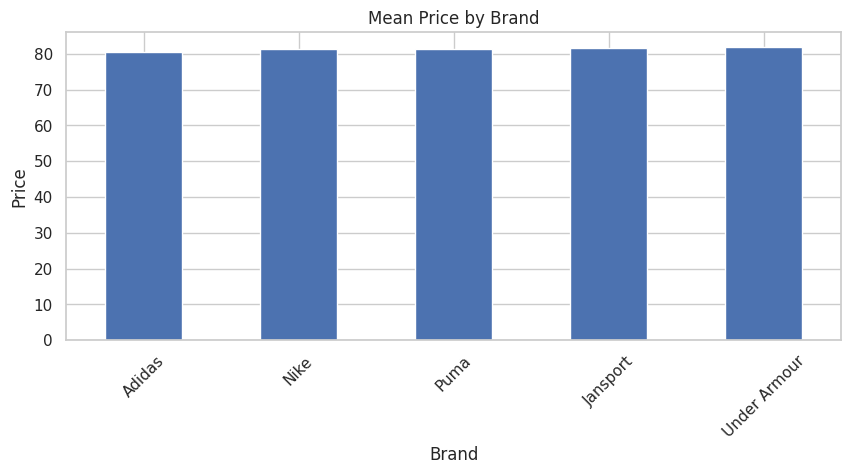


Mean Price by Material:
Material
Leather      80.437883
Nylon        81.024760
Polyester    82.033315
Canvas       82.106511
Name: Price, dtype: float64


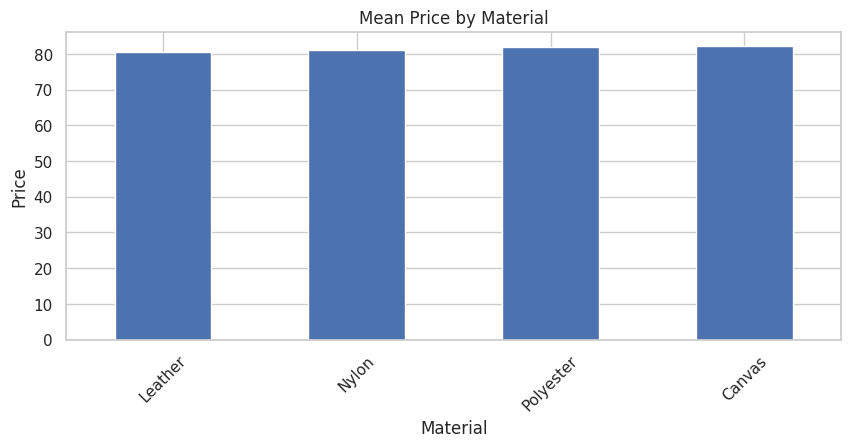


Mean Price by Size:
Size
Medium    81.343418
Small     81.424674
Large     81.651446
Name: Price, dtype: float64


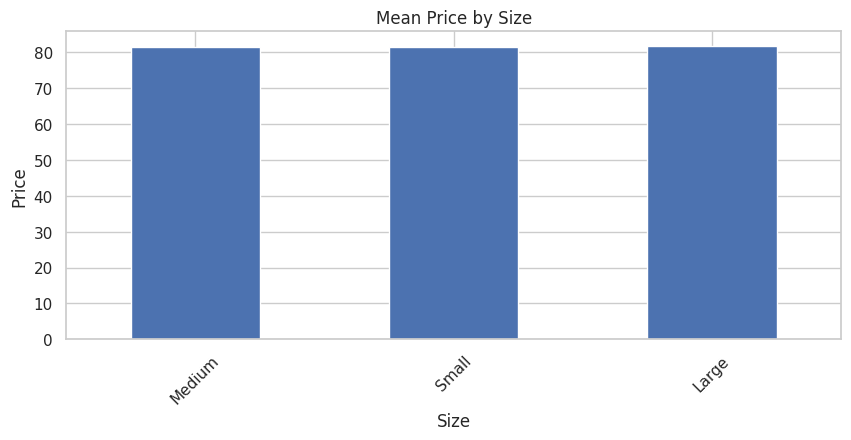


Mean Price by Laptop Compartment:
Laptop Compartment
Yes    81.463842
No     81.464702
Name: Price, dtype: float64


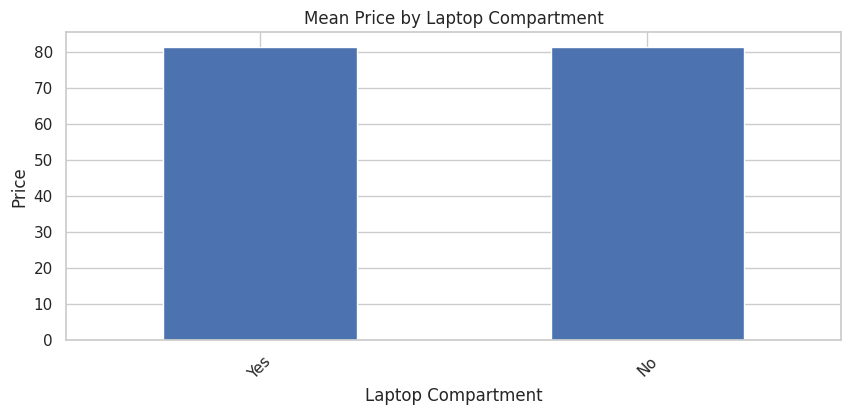


Mean Price by Waterproof:
Waterproof
Yes    81.403489
No     81.572050
Name: Price, dtype: float64


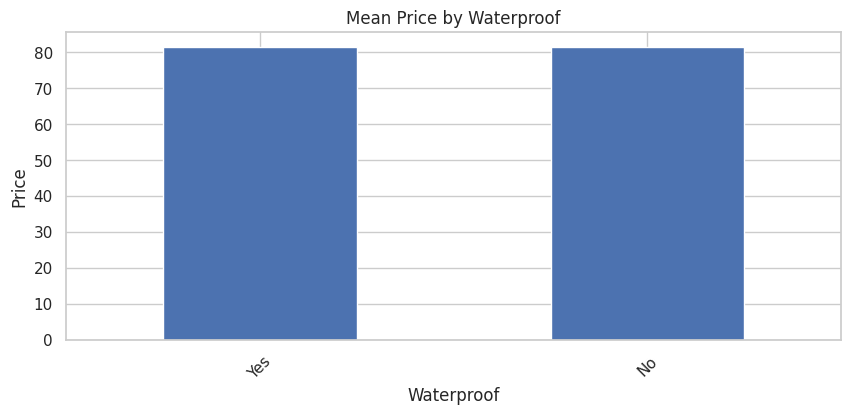


Mean Price by Style:
Style
Tote         81.374865
Backpack     81.402513
Messenger    81.410925
Name: Price, dtype: float64


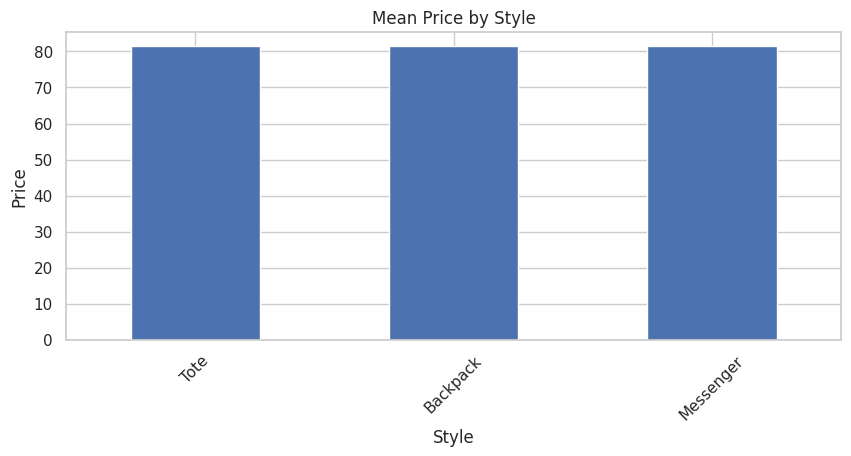


Mean Price by Color:
Color
Black    80.513439
Gray     80.851971
Red      81.011644
Pink     81.630864
Blue     82.006994
Green    82.381308
Name: Price, dtype: float64


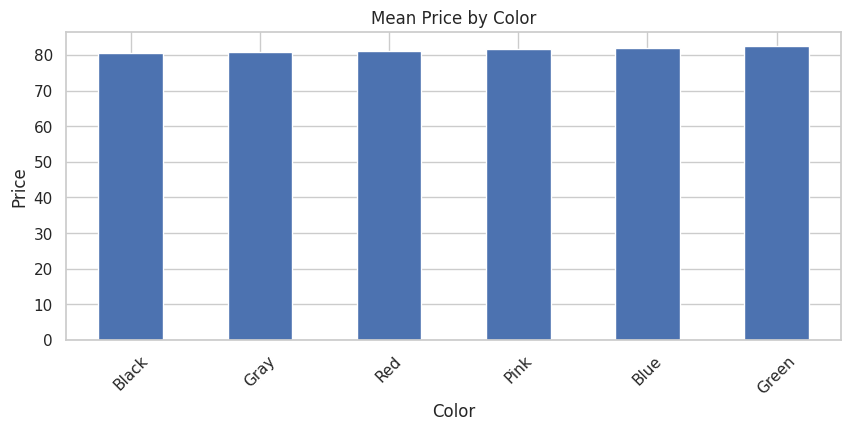

In [ ]:


# Mean Price by categorical variable
for col in categorical_cols:
    grouped = df_train.groupby(col)['Price'].mean().sort_values()
    print(f"\nMean Price by {col}:\n{grouped}")
    plt.figure(figsize=(10, 4))
    grouped.plot(kind='bar')
    plt.title(f"Mean Price by {col}")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()


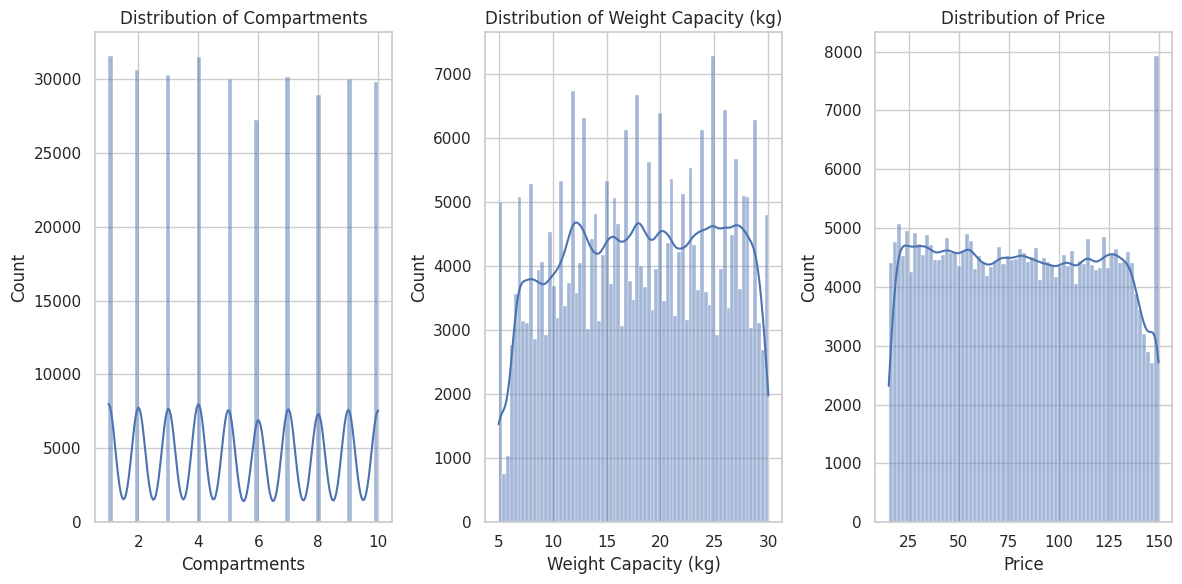

Skewness of Compartments: 0.0291
Skewness of Weight Capacity (kg): -0.0642
Skewness of Price: 0.0369


In [ ]:

# 4. Distribution Analysis
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols + ['Price']):
    plt.subplot(1, len(numerical_cols) + 1, i + 1)
    sns.histplot(df_train[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

for col in numerical_cols + ['Price']:
    skewness = skew(df_train[col].dropna())
    print(f"Skewness of {col}: {skewness:.4f}")

In [ ]:


# 5. Missing Values
print("\nMissing Values in Training Data:")
print(df_train.isnull().sum())
print("\nMissing Values in Test Data:")
print(df_test.isnull().sum())


Missing Values in Training Data:
id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

Missing Values in Test Data:
id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64


In [ ]:


# 6. Feature Importance (PCA Loadings)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_cols),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ])

X_train_processed = preprocessor.fit_transform(df_train.drop(columns=['Price']))
feature_names = preprocessor.get_feature_names_out()
pca = PCA(n_components=12)
X_train_reduced = pca.fit_transform(X_train_processed)
loadings = pd.DataFrame(pca.components_.T, index=feature_names, columns=[f"PC{i+1}" for i in range(12)])
print("\nPCA Loadings (Top 5 features per component):")
for col in loadings.columns:
    top_features = loadings[col].abs().sort_values(ascending=False).head(5)
    print(f"\n{col}:\n{top_features}")


PCA Loadings (Top 5 features per component):

PC1:
num__Weight Capacity (kg)    0.707174
num__Compartments            0.707019
cat__Style_Tote              0.002597
cat__Material_Polyester      0.002491
cat__Brand_Puma              0.002272
Name: PC1, dtype: float64

PC2:
num__Compartments            0.707159
num__Weight Capacity (kg)    0.707002
cat__Waterproof_Yes          0.004389
cat__Material_Leather        0.003709
cat__Size_Medium             0.003534
Name: PC2, dtype: float64

PC3:
cat__Style_Messenger           0.713015
cat__Style_Tote                0.680702
cat__Size_Medium               0.122034
cat__Size_Small                0.113858
cat__Laptop Compartment_Yes    0.014788
Name: PC3, dtype: float64

PC4:
cat__Size_Medium           0.723336
cat__Size_Small            0.669912
cat__Style_Messenger       0.123186
cat__Style_Tote            0.112778
cat__Brand_Under Armour    0.005349
Name: PC4, dtype: float64

PC5:
cat__Material_Polyester        0.826961
cat__Material_Leathe

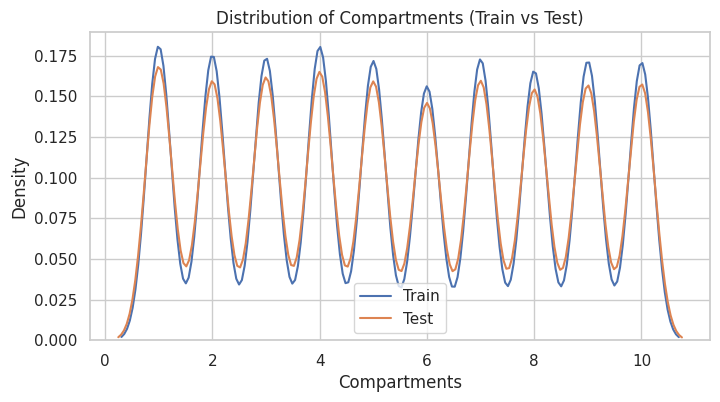

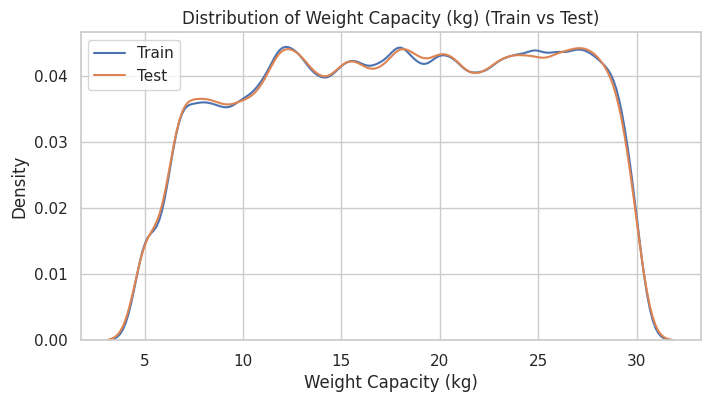


EDA Completed.


In [ ]:


# 7. Test Data Consistency
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_train[col], label='Train')
    sns.kdeplot(df_test[col], label='Test')
    plt.title(f"Distribution of {col} (Train vs Test)")
    plt.legend()
    plt.show()

print("\nEDA Completed.")

=== Data Summary ===
                   id Brand   Material    Size  Compartments  \
count     5000.000000  5000       5000    5000   5000.000000   
unique            NaN     5          4       3           NaN   
top               NaN  Puma  Polyester  Medium           NaN   
freq              NaN  1041       1369    1717           NaN   
mean    151188.479600   NaN        NaN     NaN      5.429200   
std      87283.366975   NaN        NaN     NaN      2.886287   
min          0.000000   NaN        NaN     NaN      1.000000   
25%      75043.500000   NaN        NaN     NaN      3.000000   
50%     150622.000000   NaN        NaN     NaN      5.000000   
75%     228106.000000   NaN        NaN     NaN      8.000000   
max     299917.000000   NaN        NaN     NaN     10.000000   

       Laptop Compartment Waterproof      Style Color  Weight Capacity (kg)  \
count                5000       5000       5000  5000           5000.000000   
unique                  2          2          3     

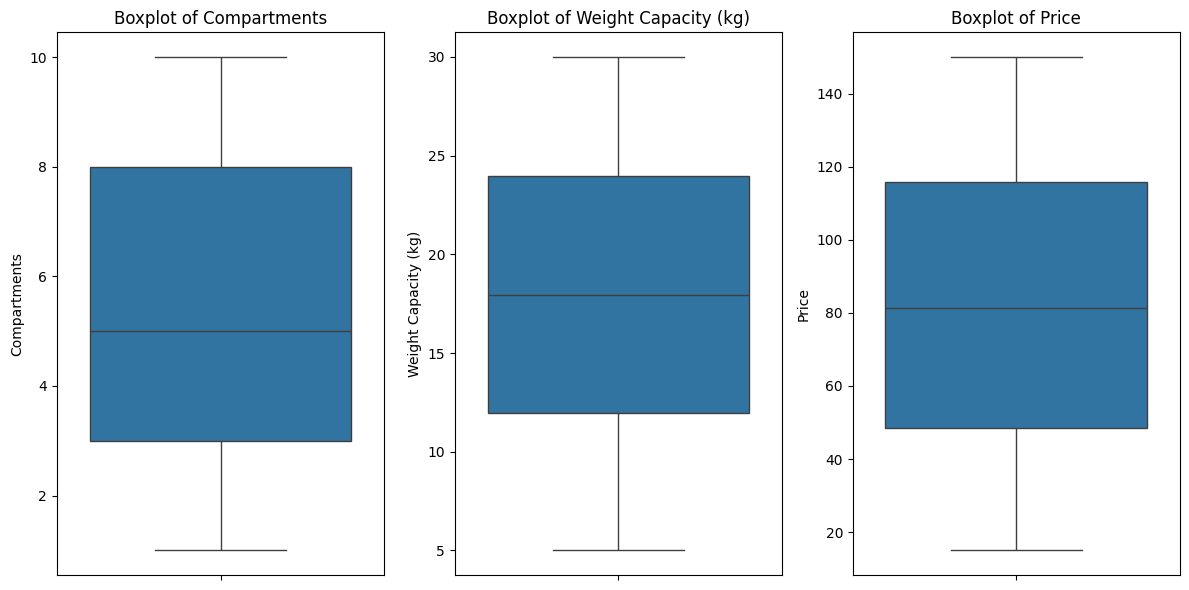


=== Spearman Correlations with Price ===
Compartments: 0.031
Waterproof_Yes: -0.028
Brand_Under Armour: 0.026
Color_Green: 0.024
Color_Red: -0.024
Material_Nylon: -0.023
Color_Gray: -0.023
Brand_Nike: -0.014
Brand_Puma: 0.011
Style_Tote: 0.009
Color_Blue: 0.008
Material_Leather: -0.008
Style_Messenger: 0.005
Laptop Compartment_Yes: 0.005
Material_Polyester: -0.004
Brand_Jansport: 0.003
Size_Medium: 0.002
Size_Small: -0.002
Color_Pink: 0.002
Weight Capacity (kg): 0.002

=== Feature Importance (Random Forest) ===
Weight Capacity (kg)      0.388481
Compartments              0.126560
Laptop Compartment_Yes    0.037539
Size_Medium               0.032458
Waterproof_Yes            0.031710
Size_Small                0.031161
Style_Messenger           0.029556
Material_Leather          0.028021
Material_Polyester        0.027970
Style_Tote                0.026821
Color_Pink                0.025878
Material_Nylon            0.025079
Brand_Jansport            0.024960
Color_Blue                0

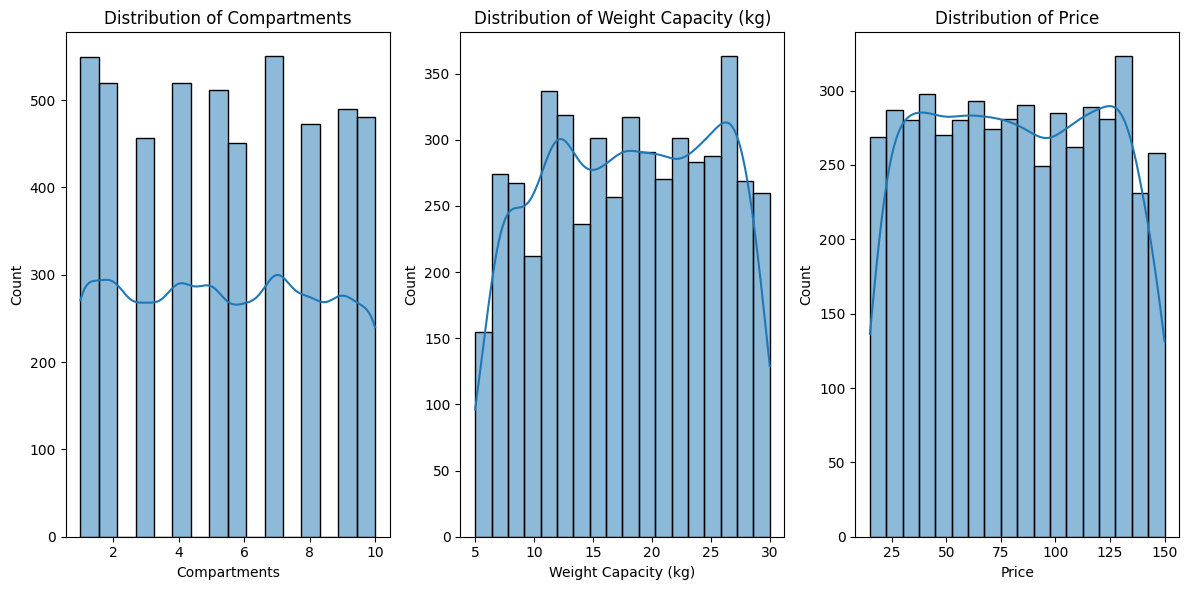


=== Skewness ===
Compartments: 0.014
Weight Capacity (kg): -0.057
Price: 0.018

=== Dataset Size ===
Training set: 5000 rows
Unique values in categorical columns:
Brand: 5 unique values
Material: 4 unique values
Size: 3 unique values
Laptop Compartment: 2 unique values
Waterproof: 2 unique values
Style: 3 unique values
Color: 6 unique values

=== Variance Inflation Factor (VIF) ===
                Feature       VIF
0          Compartments  3.128765
1  Weight Capacity (kg)  3.128765

=== Cross-Validation MSE ===
MSE per fold: [np.float64(1638.787481636025), np.float64(1547.2151697753195), np.float64(1619.284003070437), np.float64(1602.7920114184979), np.float64(1678.7275546880483)]
Mean MSE: 1617.361, Std: 43.270

=== Baseline MSE (Mean Predictor) ===
Baseline MSE: 1509.519


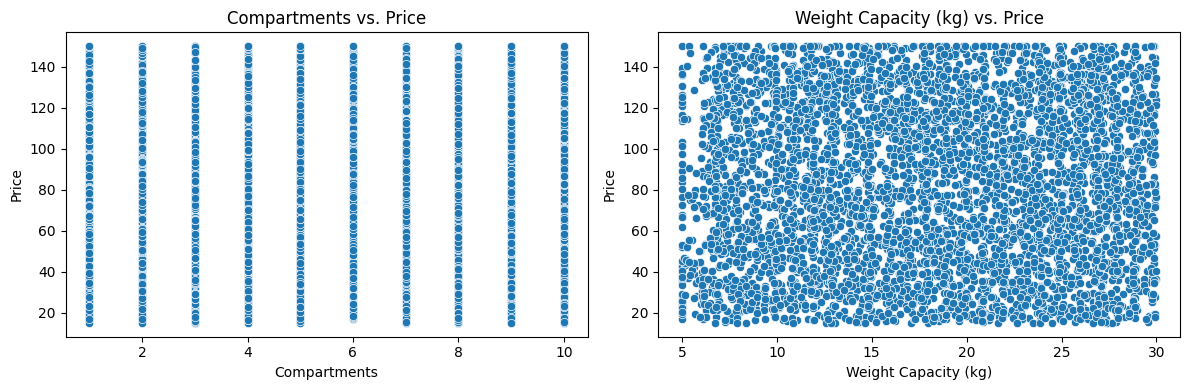

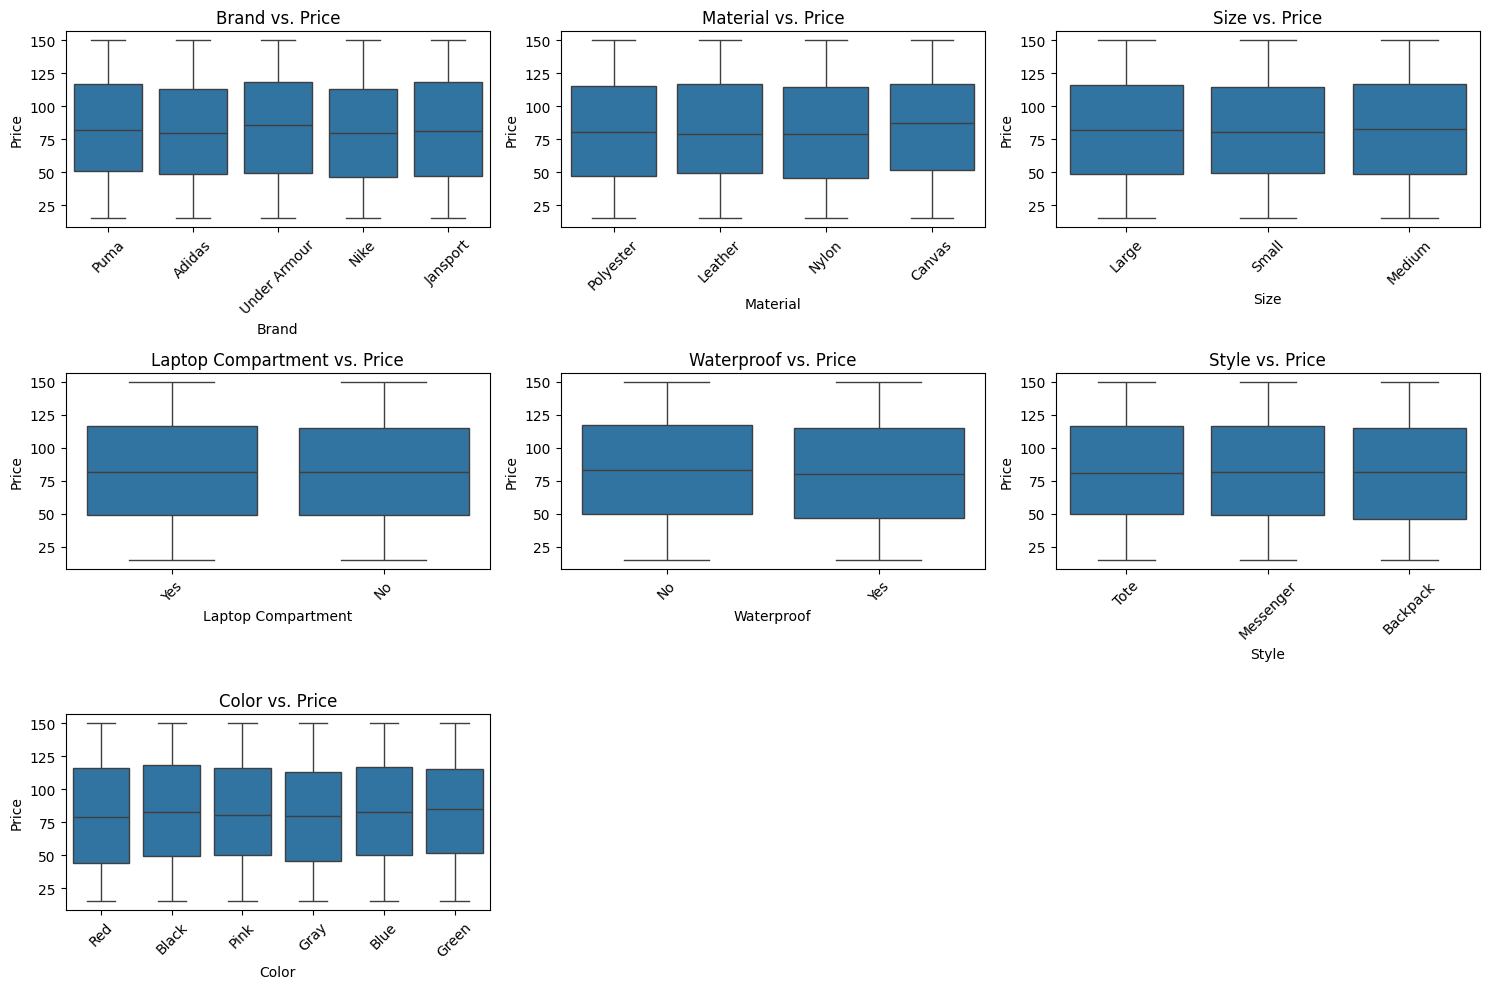

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set random seed for reproducibility
np.random.seed(8)

# Load data
train_path = '/content/drive/MyDrive/playground-series-s5e2/train.csv'
test_path = '/content/drive/MyDrive/playground-series-s5e2/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Remove rows with missing values from df_train
df_train = df_train.dropna()

# Downsample if needed
if len(df_train) > 5000:
    df_train = df_train.sample(n=5000, random_state=8)

# Split data
df_train_split, df_val = train_test_split(df_train, test_size=0.2, random_state=10)

# Define columns
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numerical_cols = ['Compartments', 'Weight Capacity (kg)']
target = 'Price'

# Ensure target exists
if target not in df_train.columns:
    raise ValueError("Target column 'Price' not found in dataset.")

# 1. Inspect for Errors and Noise
print("=== Data Summary ===")
print(df_train.describe(include='all'))
print("\n=== Missing Values ===")
print(df_train.isnull().sum())

# Outliers: Boxplot for numerical columns and target
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols + [target], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 2. Analyze Feature Relevance
# Encode categorical variables for correlation/feature importance
df_encoded = pd.get_dummies(df_train[categorical_cols], drop_first=True)
df_encoded = pd.concat([df_train[numerical_cols + [target]], df_encoded], axis=1)

# Spearman correlation (suitable for non-linear relationships)
correlations = {}
for col in df_encoded.columns:
    if col != target:
        corr, _ = spearmanr(df_encoded[col], df_encoded[target])
        correlations[col] = corr
print("\n=== Spearman Correlations with Price ===")
for col, corr in sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{col}: {corr:.3f}")

# Feature Importance via Random Forest
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
rf = RandomForestRegressor(n_estimators=100, random_state=8)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Feature Importance (Random Forest) ===")
print(importances)

# 3. Examine Data Distribution
# Histograms for numerical columns and target
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols + [target], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Check skewness
print("\n=== Skewness ===")
for col in numerical_cols + [target]:
    print(f"{col}: {df_train[col].skew():.3f}")

# 4. Assess Dataset Size and Diversity
print(f"\n=== Dataset Size ===")
print(f"Training set: {len(df_train)} rows")
print(f"Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df_train[col].nunique()} unique values")

# 5. Check for Multicollinearity (numerical features)
X_num = df_train[numerical_cols]
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
print("\n=== Variance Inflation Factor (VIF) ===")
print(vif_data)

# 6. Cross-Validation for Consistency
kf = KFold(n_splits=5, shuffle=True, random_state=8)
mse_scores = []
for train_idx, val_idx in kf.split(df_train):
    train_fold = df_train.iloc[train_idx]
    val_fold = df_train.iloc[val_idx]

    # Simple preprocessing for CV
    X_train = pd.get_dummies(train_fold[categorical_cols], drop_first=True)
    X_train = pd.concat([train_fold[numerical_cols], X_train], axis=1)
    y_train = train_fold[target]
    X_val = pd.get_dummies(val_fold[categorical_cols], drop_first=True)
    X_val = pd.concat([val_fold[numerical_cols], X_val], axis=1)
    y_val = val_fold[target]

    # Align columns
    X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=8)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = np.mean((y_val - y_pred) ** 2)
    mse_scores.append(mse)

print("\n=== Cross-Validation MSE ===")
print(f"MSE per fold: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores):.3f}, Std: {np.std(mse_scores):.3f}")

# 7. Baseline Comparison
baseline_pred = np.mean(df_train[target])
baseline_mse = np.mean((df_train[target] - baseline_pred) ** 2)
print("\n=== Baseline MSE (Mean Predictor) ===")
print(f"Baseline MSE: {baseline_mse:.3f}")

# 8. Visualize Feature-Target Relationships
# Scatter plots for numerical features vs. Price
plt.figure(figsize=(12, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=df_train[col], y=df_train[target])
    plt.title(f"{col} vs. Price")
plt.tight_layout()
plt.show()

# Boxplots for categorical features vs. Price
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_train[col], y=df_train[target])
    plt.title(f"{col} vs. Price")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()